**Tast First**
TITANIC SURVIVAL PREDICTION
---



* Use the Titanic dataset to build a model that predicts whether
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
* The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.





In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [131]:
df=pd.read_csv("/content/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [132]:
df.shape

(418, 12)

In [133]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [134]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [135]:
df['Sex']

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

<Axes: xlabel='Parch', ylabel='count'>

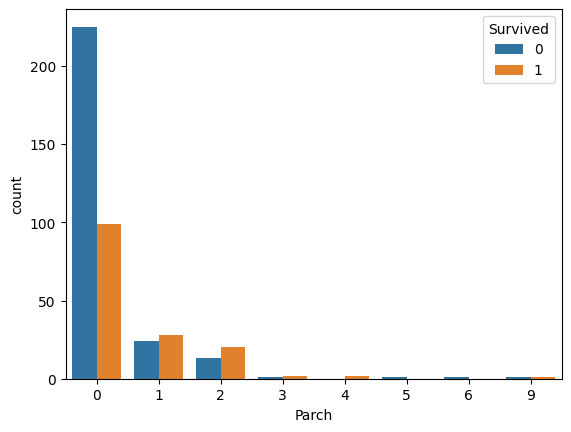

In [136]:
sb.countplot(x=df['Parch'],hue=df['Survived'])

In [137]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,1.0
male,0.0


In [138]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

<Axes: xlabel='Sex', ylabel='count'>

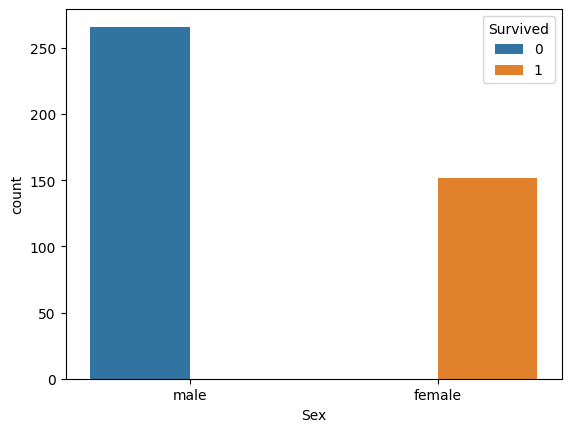

In [139]:
sb.countplot(x=df['Sex'],hue=df['Survived'])

<Axes: xlabel='Survived', ylabel='count'>

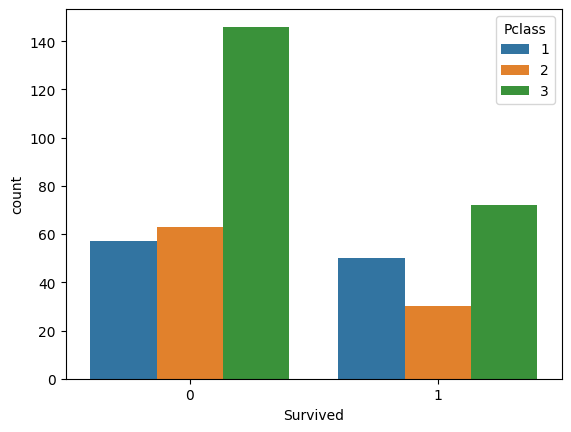

In [140]:
sb.countplot(x=df['Survived'],hue=df['Pclass'])

In [141]:
from sklearn.preprocessing import LabelEncoder
LEncoder= LabelEncoder()
df['Sex']= LEncoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [142]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [143]:
X=df[['Pclass','Sex']]
Y=df['Survived']

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [145]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression(random_state=0)
log.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [146]:
pred=print(log.predict(X_test))

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0]


In [147]:
print(Y_test)

360    0
170    0
224    1
358    0
309    1
      ..
100    1
7      0
22     1
68     0
328    0
Name: Survived, Length: 84, dtype: int64


---
write a program that give a answer when condition true means pasenger survived or not

---



In [148]:
from IPython.utils.path import warn
A=[]
print("Plesr enter Passenger Pasenger CLass And there gender(female=0 or male=1)")
print("\n Passenger Class (PClass):=")
a=int(input())
print("Enter Passenger Gender in a format of '0' or '1'(female=0 or male=1)")
b=int(input())
A.append(a)
A.append(b)
result=log.predict([[A[0],A[1]]])
if(result==0):
  print("sorry!!,The Passenger Cann't survived")
else:
  print("saved!!,The Passenger Safely Rescued")

Plesr enter Passenger Pasenger CLass And there gender(female=0 or male=1)

 Passenger Class (PClass):=
3
Enter Passenger Gender in a format of '0' or '1'(female=0 or male=1)
1
sorry!!,The Passenger Cann't survived
